<a href="https://colab.research.google.com/github/AdvaithMenon/Parallelized-Tremaux-Algorithm/blob/master/Parallel_Tremaux_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
programResults = pd.read_csv("/content/drive/My Drive/Results.csv")

In [3]:
programResults.describe()

,Sparsity,Maze Size,Thread Count,Time
count,9360.000000,9360.000000,9360.000000,9360.000000
mean,5.000000,50.000000,3.500000,4539.834829
std,3.415833,18.709286,1.707916,5393.320143
min,0.000000,20.000000,1.000000,144.000000
25%,2.000000,35.000000,2.000000,1354.000000
50%,5.000000,50.000000,3.500000,2700.500000
75%,8.000000,65.000000,5.000000,5489.000000
max,10.000000,80.000000,6.000000,49298.000000


In [4]:
def GraphTimings(sparsity):
    mazeSizes = list(programResults['Maze Size'].unique())
    threads = list(programResults['Thread Count'].unique())
    x_points = np.arange(len(mazeSizes))

    bar_width = 0.75/len(threads)

    fig, ax = plt.subplots(figsize =(20, 10))


    averageTimes = []

    for thread in range(len(threads)):
        data = programResults[(programResults['Thread Count'] == threads[thread]) & (programResults['Sparsity'] == sparsity)]
        timings = list(data.groupby('Maze Size')['Time'].mean())
        plt.bar(x_points + bar_width*(thread-(len(threads)//2)), timings, label="Thread Count = " + str(threads[thread]) if threads[thread] > 1 else "Serial", width=bar_width, edgecolor="black")

    plt.xticks(x_points, list(map(str, mazeSizes)))
    plt.legend()

    plt.xlabel("Maze Dimensions (nxn)")
    plt.ylabel("Time to Solve (ms)")
    plt.title("Sparsity Factor = " + str(sparsity))

    plt.show()


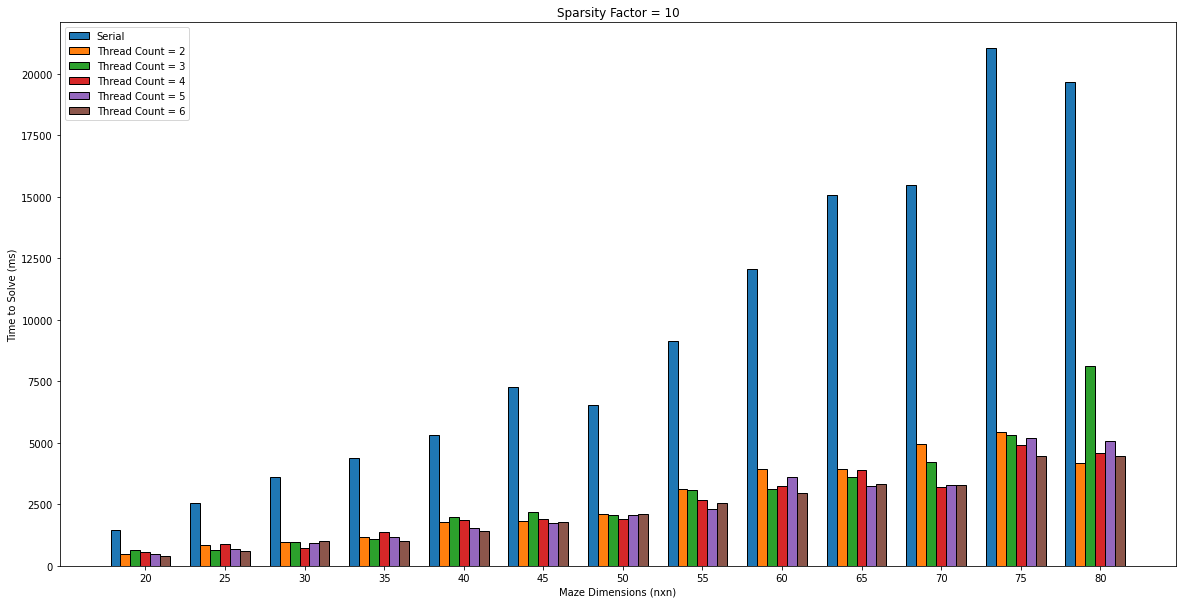

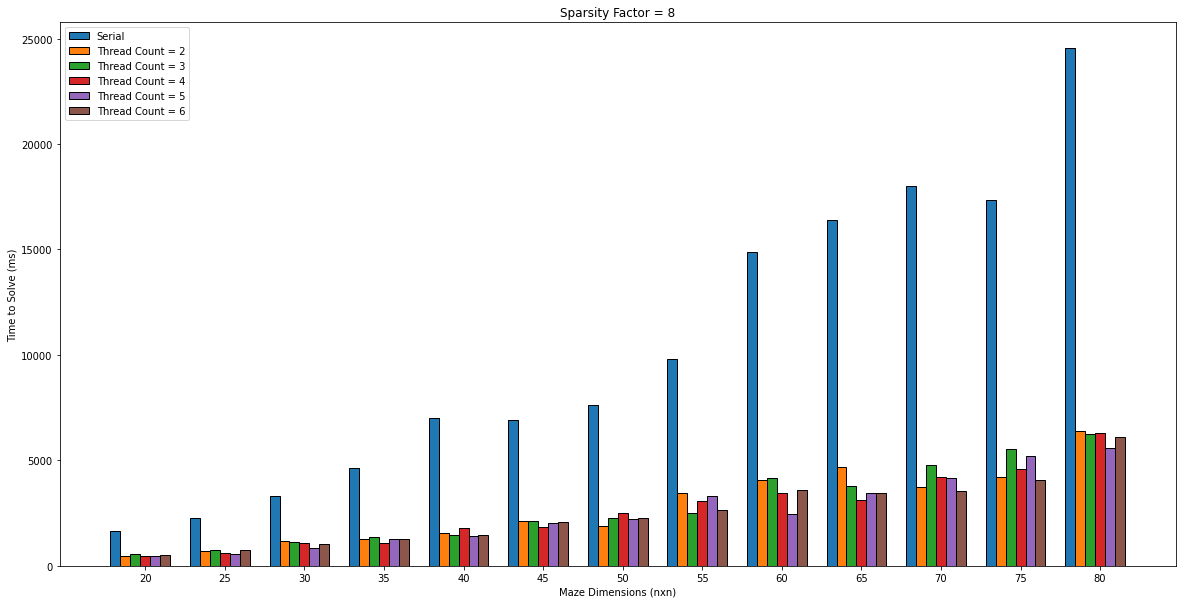

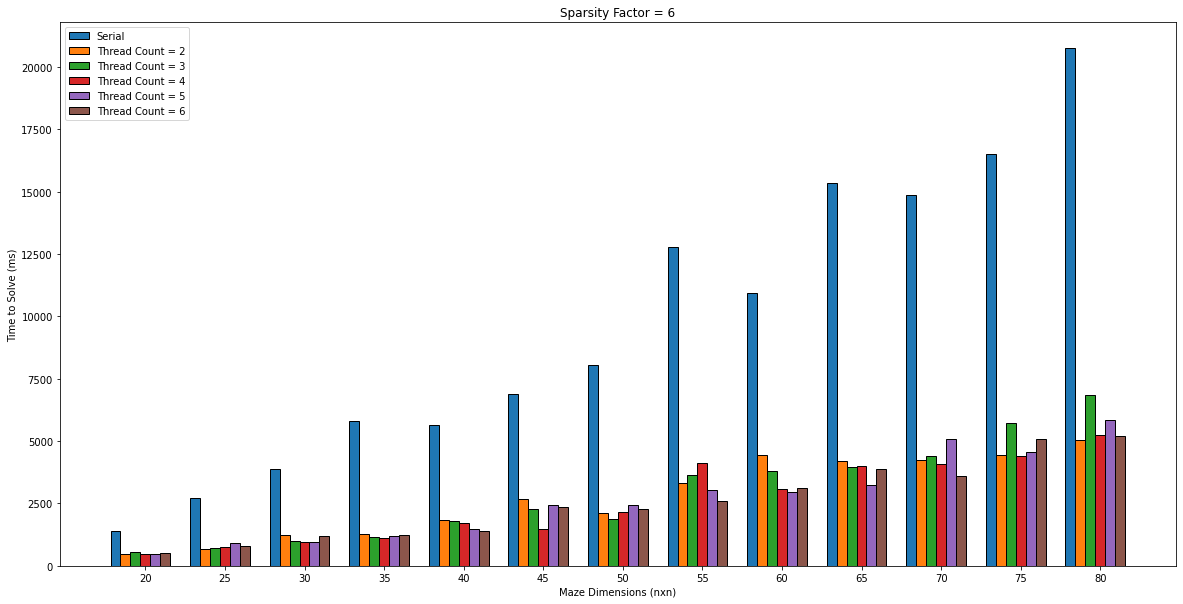

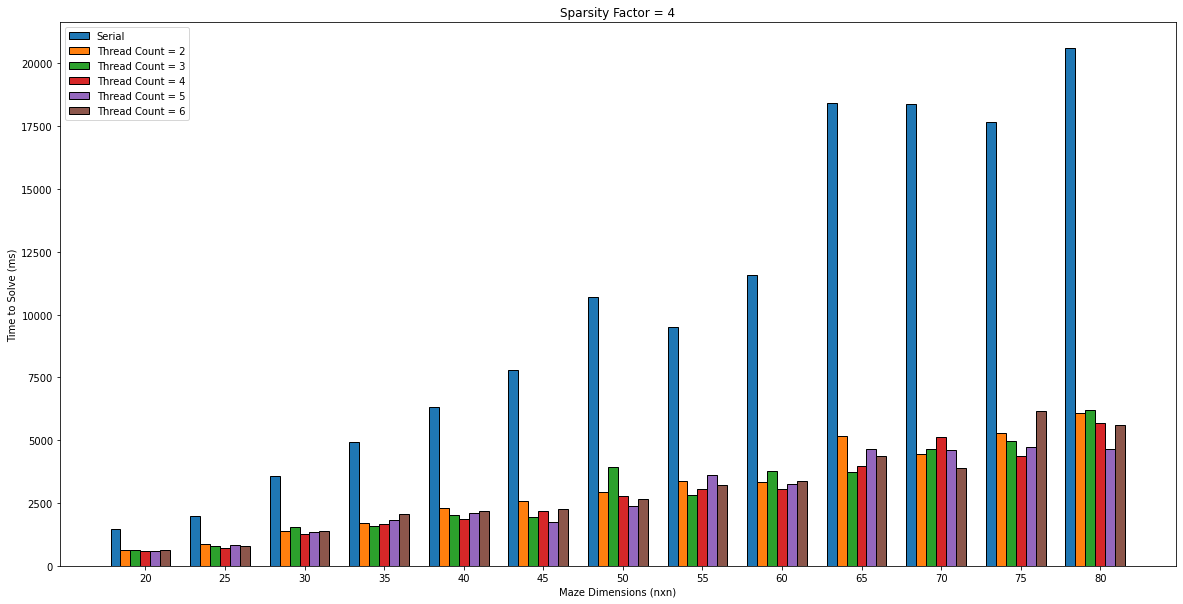

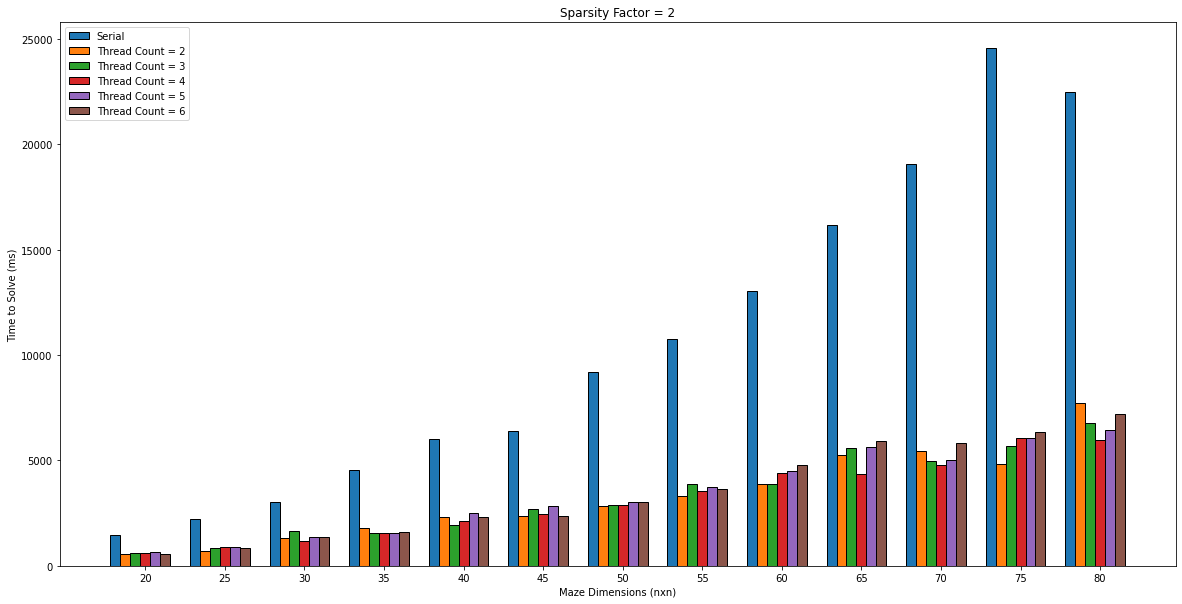

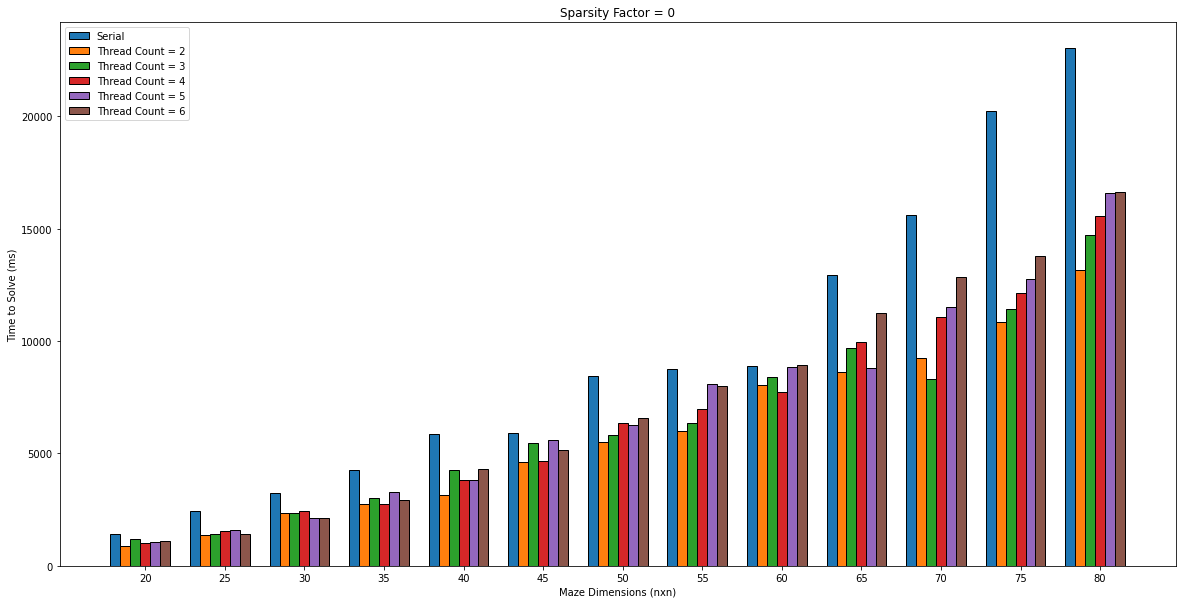

In [5]:
sparsities = list(programResults['Sparsity'].unique())
for sparsity in sparsities:
    GraphTimings(sparsity)

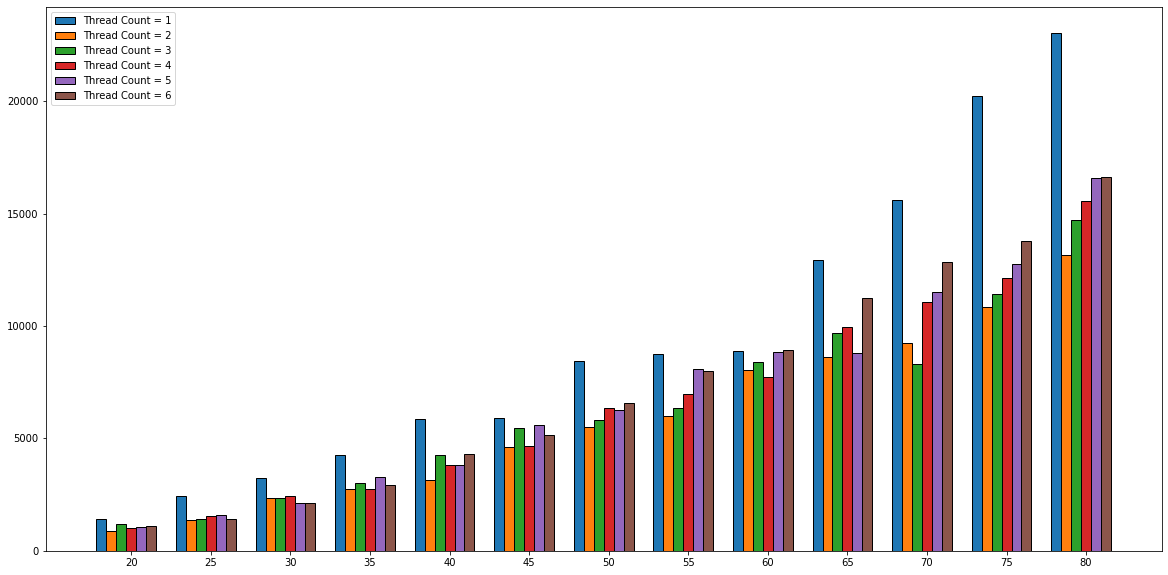

In [ ]:
GraphTimings(0)

In [ ]:
pd.set_option('display.max_rows', None)
Averages = programResults[(programResults['Thread Count' ] == 1) | (programResults['Thread Count'] == 6)].groupby(['Sparsity', 'Maze Size', 'Thread Count']).mean()
display(Averages)

#Averages.to_csv("/content/drive/My Drive/Averages.csv")

Time
Sparsity Maze Size Thread Count          
0        20        1              1419.60
                   6              1123.95
         25        1              2417.10
                   6              1409.60
         30        1              3244.40
                   6              2136.75
         35        1              4270.60
                   6              2907.30
         40        1              5852.95
                   6              4308.00
         45        1              5913.85
                   6              5154.95
         50        1              8443.10
                   6              6560.20
         55        1              8744.20
                   6              7975.40
         60        1              8908.05
                   6              8945.40
         65        1             12948.65
                   6             11254.10
         70        1             15580.60
                   6             12858.50
         75        1             20234.90
                   6             13798.25
         80        1             23025.35
                   6             16642.00
2        20        1              1485.05
                   6               539.05
         25        1              2244.50
                   6               847.00
         30        1              3005.10
                   6              1373.20
         35        1              4539.60
                   6              1620.85
         40        1              6033.10
                   6              2302.55
         45        1              6411.50
                   6              2362.25
         50        1              9211.60
                   6              3033.15
         55        1             10779.25
                   6              3622.10
         60        1             13049.75
                   6              4764.05
         65        1             16158.00
                   6              5913.20
         70        1             19055.45
                   6              5817.10
         75        1             24573.95
                   6              6366.40
         80        1             22477.95
                   6              7204.85
4        20        1              1462.60
                   6               624.25
         25        1              1984.95
                   6               804.60
         30        1              3559.35
                   6              1391.75
         35        1              4941.50
                   6              2047.30
         40        1              6329.05
                   6              2192.90
         45        1              7780.95
                   6              2274.85
         50        1             10692.50
                   6              2679.45
         55        1              9500.05
                   6              3199.95
         60        1             11568.60
                   6              3367.65
         65        1             18442.10
                   6              4361.05
         70        1             18380.85
                   6              3884.50
         75        1             17656.05
                   6              6149.55
         80        1             20612.35
                   6              5622.40
6        20        1              1409.95
                   6               529.05
         25        1              2729.30
                   6               796.90
         30        1              3862.65
                   6              1183.50
         35        1              5803.70
                   6              1243.00
         40        1              5654.20
                   6              1409.50
         45        1              6872.60
                   6              2358.10
         50        1              8060.00
                   6              2275.15
         55        1             12800.30
                   6              2609.85
     